
# Overview 

Usage of Cryptocompare API to make Crypto TS Analysis


In [0]:
import requests
import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates



# Cryptocompare API Usage 

- This function makes use of [Cryptocompare API](https://min-api.cryptocompare.com/documentation?key=Historical&cat=dataHistohour) to access Crypto related Data 



In [0]:
"""
Using Cryptocompare API to get JSON about Price Time Series 
ARGS 
- in_sym = Target Symbol 
- in_base = Supported symbols [USD,JPY,EUR]
- in_lim = Max Number of Items 
"""
def cryptocompare_hour_price(in_sym, in_base, in_lim): 
  t_url = 'https://min-api.cryptocompare.com/data/histohour?fsym={}&tsym={}&limit={}'.format(in_sym.upper(), in_base.upper(), in_lim)
  t_df = pd.DataFrame(requests.get(t_url).json()['Data'])
  t_df.index = [datetime.datetime.fromtimestamp(x) for x in t_df.time]
  return t_df



# Getting Data 

- This example gets the most recent 10h prices of BTC expressed in USD 


In [5]:
t_df_btc=cryptocompare_hour_price('BTC', 'USD', 10)
t_df_btc


,close,high,low,open,time,volumefrom,volumeto
2018-12-18 07:00:00,3551.36,3557.56,3529.09,3534.70,1545116400,3717.34,13313553.66
2018-12-18 08:00:00,3498.00,3551.49,3487.03,3551.36,1545120000,5151.34,18039467.34
2018-12-18 09:00:00,3496.34,3500.04,3481.46,3498.00,1545123600,2468.60,8623796.15
2018-12-18 10:00:00,3508.82,3514.09,3487.48,3496.34,1545127200,1960.66,6868651.52
2018-12-18 11:00:00,3525.47,3534.56,3487.16,3508.82,1545130800,2265.96,7948638.91
2018-12-18 12:00:00,3522.34,3529.11,3506.56,3525.47,1545134400,2011.00,7090010.11
2018-12-18 13:00:00,3575.34,3591.58,3517.00,3522.34,1545138000,4600.98,16392409.66
2018-12-18 14:00:00,3602.29,3616.57,3564.74,3575.34,1545141600,6030.81,21617772.56
2018-12-18 15:00:00,3552.04,3611.94,3551.76,3602.29,1545145200,4483.24,15974685.41
2018-12-18 16:00:00,3564.98,3579.65,3550.96,3552.04,1545148800,2975.32,10627910.68



# Plotting 

- Using Pandas Plot 


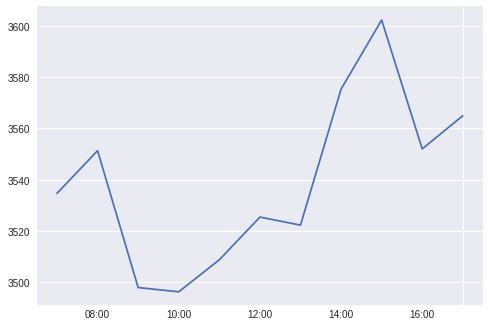

In [10]:
t_df_btc.open.plot()

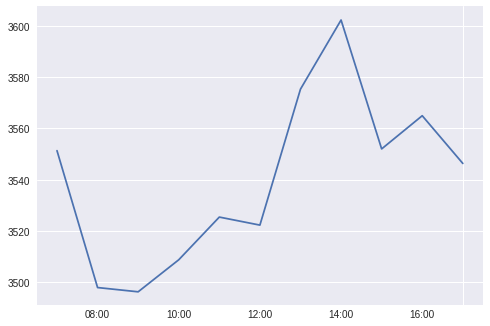

In [6]:
t_df_btc.close.plot()

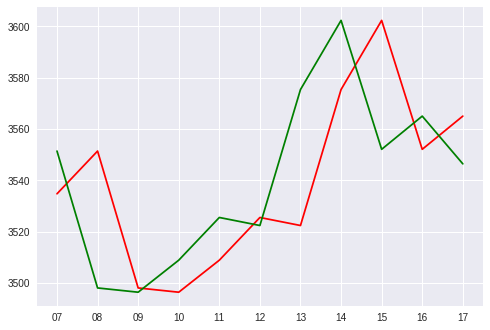

In [25]:
# NOTE: On the x-axis just plot hours 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
plt.plot(t_df_btc.open, color='r')
plt.plot(t_df_btc.close, color='g')
plt.show()

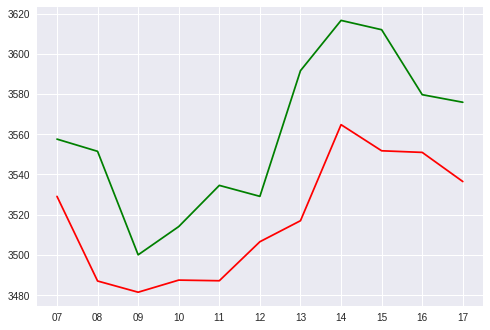

In [24]:
# NOTE: On the x-axis just plot hours 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
plt.plot(t_df_btc.low, color='r')
plt.plot(t_df_btc.high, color='g')
plt.show()